# Pymaceuticals Inc.

Analysis:

After performing the detailed analysis shown below, it can be argued that Capomulin is indeed an effective drug that can be used to treat for skin cancer and tumors.

Firstly, we can see from the summary statistics that Capomulin had one of the lowest averages (and other stats) in tumors in comparison to the other drugs. The only other drug that remained competitive with Capomulin was Ramicane, which may have performed slightly better.

Furthermore, the bar plot shows that these two drugs had the highest timepoints as well, again demonstrating the effectiveness of the drugs. The pie chart shows that the study was done evenly between male and female mice. As a result, we can likely conclude that the drug would be safe to use by both genders. The box plots provide a visual of the statistics which is easier to view for the user. Here, it shows Capomulin and Ramicane resulting in the lowest statistics for Tumor Volumes overall. 

Although the line plot only displays a visual of one mouse, we are trying to prove the effectiveness of Capomulin further. Based on this plot, we can see that the tumor volumes were going in a downward trend as the timepoints passed, another plus.

Lastly, we like to show the correlation betweeen mouse weight and average tumor volume. It is clear that there is a strong correlation between increased weights and increased average tumor volumes. The mice with higher weights resulted in higher tumor volumes.

Overall, we recommend Capomulin as a great treatment for skin cancer. It performed significantly better than the other drugs and its validity was further proven by its competitiveness with Ramicane.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
number_of_mice = merged_data["Mouse ID"].nunique()
number_of_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = merged_data.set_index("Mouse ID")
duplicate_mice_df.loc["g989"]

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
number_of_clean_mice_df = duplicate_mice_df.drop("g989")
number_of_clean_mice_df.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
b128,5,45.651331,0,Capomulin,Female,9,22
b128,10,43.270852,0,Capomulin,Female,9,22
b128,15,43.784893,0,Capomulin,Female,9,22
b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_df = number_of_clean_mice_df.reset_index()
cleaned_df["Mouse ID"].nunique()

248

In [8]:
## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
sum_stat = cleaned_df.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume.
sum_stat_mean = sum_stat["Tumor Volume (mm3)"].mean()
sum_stat_median = sum_stat["Tumor Volume (mm3)"].median()
sum_stat_variance = sum_stat["Tumor Volume (mm3)"].var()
sum_stat_std = sum_stat["Tumor Volume (mm3)"].std()
sum_stat_sem = sum_stat["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
sum_stat_df = pd.DataFrame({"Mean": sum_stat_mean,
                            "Median": sum_stat_median,
                            "Variance": sum_stat_variance,
                            "Standard Dev": sum_stat_std,
                            "SEM": sum_stat_sem
                           })
sum_stat_df

,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_method = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].describe()
agg_method

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

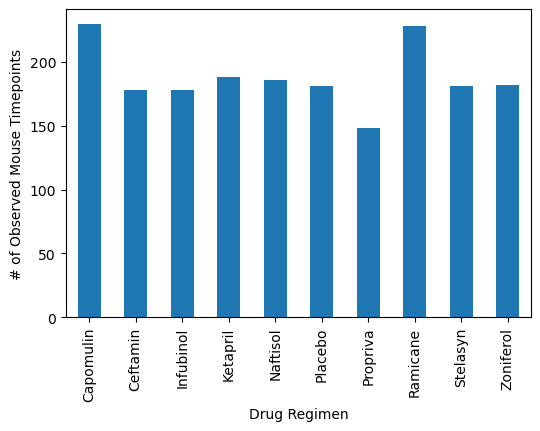

<Figure size 640x480 with 0 Axes>

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
time_point = cleaned_df.groupby(["Drug Regimen"])["Timepoint"].count()

bar_plot_1 = time_point.plot(kind="bar", figsize=(6, 4))

plt.ylabel("# of Observed Mouse Timepoints")

plt.show()
plt.tight_layout()

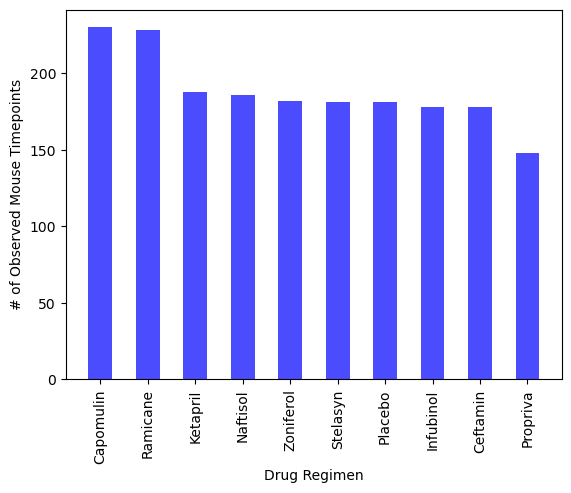

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
time_point2 = cleaned_df["Drug Regimen"].value_counts()

x_axis = time_point2.index.values
y_axis = time_point2.values

plt.bar(x_axis, y_axis, color="b", width=0.5, alpha=0.7, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.xlim()

plt.show()

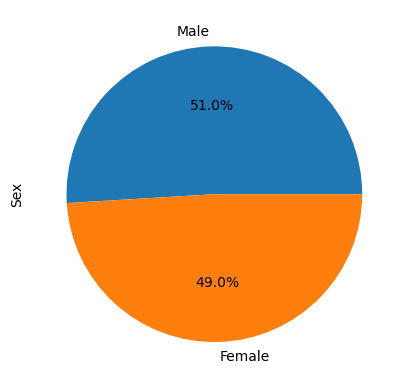

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_female = cleaned_df["Sex"].value_counts()

pie_plot = male_vs_female.plot(kind="pie", autopct= "%1.1f%%")

plt.show()

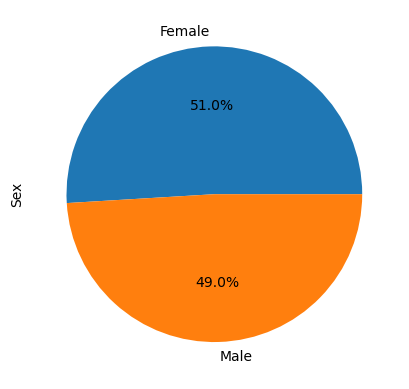

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(male_vs_female, labels=("Female", "Male"), autopct= "%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
capomulin = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin", :]
ramicane = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane", :]
infubinol = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol", :]
ceftamin = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin", :]

capomulin_max = pd.DataFrame(capomulin.groupby("Mouse ID").max()["Timepoint"])
ramicane_max = pd.DataFrame(ramicane.groupby("Mouse ID").max()["Timepoint"])
infubinol_max = pd.DataFrame(infubinol.groupby("Mouse ID").max()["Timepoint"])
ceftamin_max = pd.DataFrame(ceftamin.groupby("Mouse ID").max()["Timepoint"])

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capomulin_df = pd.merge(capomulin_max, cleaned_df, on=("Mouse ID", "Timepoint"), how="left")
ramicane_df = pd.merge(ramicane_max, cleaned_df, on=("Mouse ID", "Timepoint"), how="left")
infubinol_df = pd.merge(infubinol_max, cleaned_df, on=("Mouse ID", "Timepoint"), how="left")
ceftamin_df = pd.merge(ceftamin_max, cleaned_df, on=("Mouse ID", "Timepoint"), how="left")

In [20]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.     

#Capomulin:
capomulin_tumor = capomulin_df["Tumor Volume (mm3)"]
quartiles = capomulin_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("Capolumin Results:")
print(f"The lower quartile of Capomulin tumors is: {lowerq}")
print(f"The upper quartile of Capomulin tumors is: {upperq}")
print(f"The interquartile range of Capomulin tumors is: {iqr}")
print(f"The the median of Capomulin tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#Ramicane:
ramicane_tumor = ramicane_df["Tumor Volume (mm3)"]
quartiles = ramicane_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("-------------------------------------------------------------------------------")
print("Ramicane Results:")
print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The the median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#Infubinol:
infubinol_tumor = infubinol_df["Tumor Volume (mm3)"]
quartiles = infubinol_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("-------------------------------------------------------------------------------")
print("Infubinol Results:")
print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The the median of Infubinol tumor is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#Ceftamin:
ceftamin_tumor = ceftamin_df["Tumor Volume (mm3)"]
quartiles = ceftamin_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("-------------------------------------------------------------------------------")
print("Ceftamin Results:")
print(f"The lower quartile of Ceftamin tumors is: {lowerq}")
print(f"The upper quartile of Ceftamin tumors is: {upperq}")
print(f"The interquartile range of Ceftamin tumors is: {iqr}")
print(f"The the median of Ceftamin tumor is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Capolumin Results:
The lower quartile of Capomulin tumors is: 32.37735684
The upper quartile of Capomulin tumors is: 40.1592203
The interquartile range of Capomulin tumors is: 7.781863460000004
The the median of Capomulin tumors is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
-------------------------------------------------------------------------------
Ramicane Results:
The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The the median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
-------------------------------------------------------------------------------
Infubinol Results:
The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubino

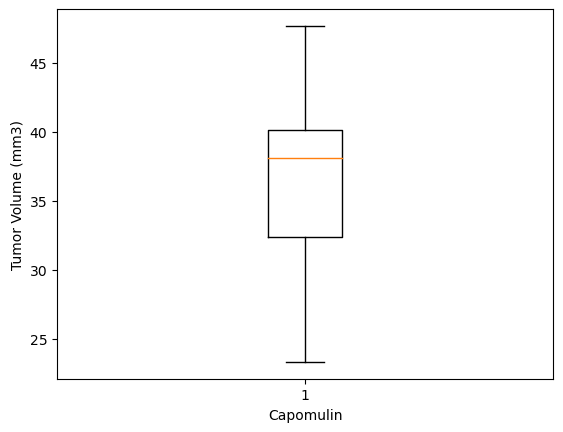

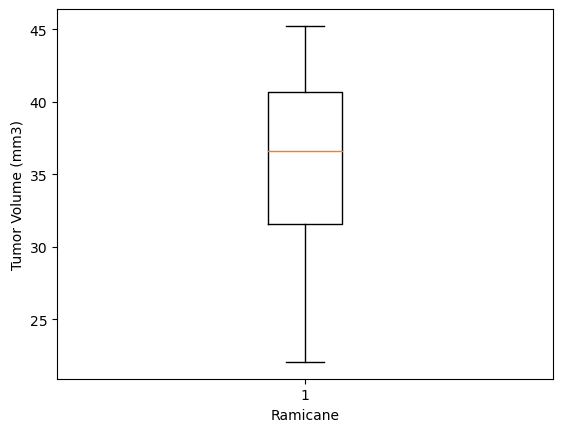

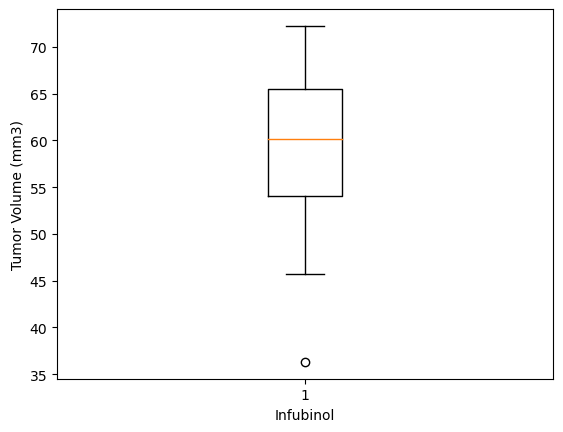

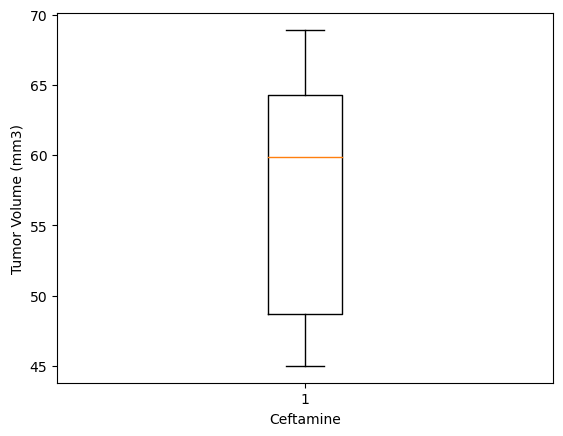

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

#Capomulin:
fig1, ax1 = plt.subplots()
ax1.set_xlabel("Capomulin")
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(capomulin_tumor)
plt.show()

#Ramicane:
fig1, ax1 = plt.subplots()
ax1.set_xlabel("Ramicane")
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(ramicane_tumor)
plt.show()

#Infubinol:
fig1, ax1 = plt.subplots()
ax1.set_xlabel("Infubinol")
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(infubinol_tumor)
plt.show()

#Ceftamine:
fig1, ax1 = plt.subplots()
ax1.set_xlabel("Ceftamine")
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(ceftamin_tumor)
plt.show()

## Line and Scatter Plots

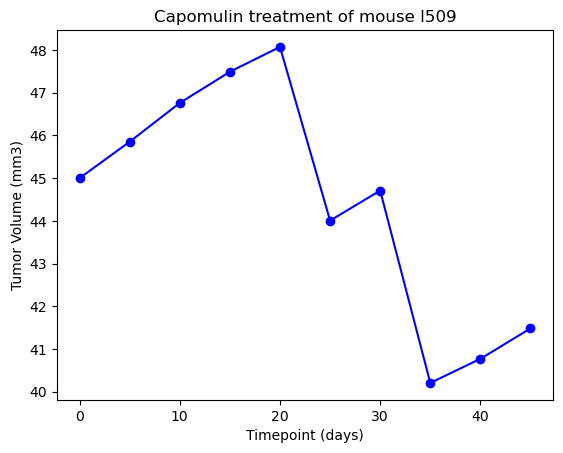

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse = cleaned_df.loc[cleaned_df["Mouse ID"] == "l509"]

plt.plot(single_mouse["Timepoint"], single_mouse["Tumor Volume (mm3)"], marker="o", color="b")

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

plt.show()

C:\Users\gurpa\AppData\Local\Temp\ipykernel_12428\186787230.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_average = capomulin_df.groupby(["Mouse ID"]).mean()


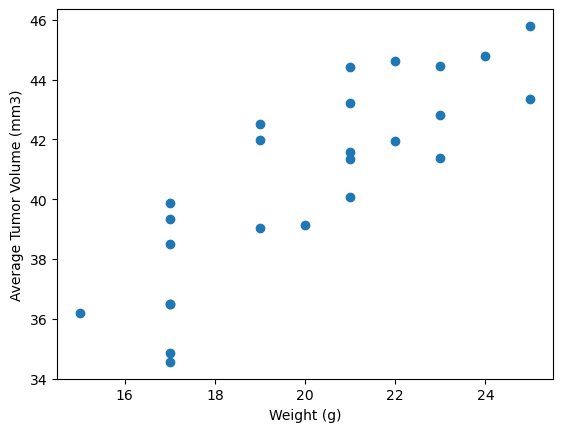

In [23]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]

capomulin_average = capomulin_df.groupby(["Mouse ID"]).mean()

plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


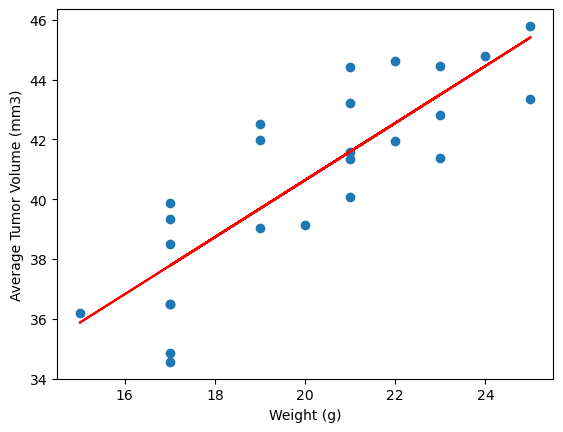

In [24]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = capomulin_average["Weight (g)"]
average_tumor = capomulin_average["Tumor Volume (mm3)"]
correlation = st.pearsonr(weight, average_tumor)

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, average_tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weight, average_tumor)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()